## Загрузка датасета:

In [ ]:
!rm -rf /root/.cache/huggingface
!rm -rf /content/hf_cache
!pip install -U datasets[audio] huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.4/515.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 24.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.33.1
    Uninstalling huggingface-hub-0.33.1:
      Successfully uninstalled huggingface-hub-0.33.1
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3

In [ ]:
!pip install textgrid

  Preparing metadata (setup.py) ... done
  Created wheel for textgrid: filename=TextGrid-1.6.1-py3-none-any.whl size=10146 sha256=e40f32c94da6e8239094eb61c171a755a30f22540fcde121973559d2fcc361e5
  Stored in directory: /root/.cache/pip/wheels/7a/c5/96/5e43aa4c640995fbbb0b9a7b98e6007bfd777add3c7e56d70a
Successfully built textgrid


In [ ]:
from datasets import load_dataset

dataset = load_dataset(
    "mozilla-foundation/common_voice_11_0",
    "ru",
    split="train",
    cache_dir="/content/hf_cache"
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

common_voice_11_0.py: 0.00B [00:00, ?B/s]

languages.py: 0.00B [00:00, ?B/s]

release_stats.py: 0.00B [00:00, ?B/s]

The repository for mozilla-foundation/common_voice_11_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_11_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


n_shards.json: 0.00B [00:00, ?B/s]

audio/ru/train/ru_train_0.tar:   0%|          | 0.00/869M [00:00<?, ?B/s]

audio/ru/dev/ru_dev_0.tar:   0%|          | 0.00/382M [00:00<?, ?B/s]

audio/ru/test/ru_test_0.tar:   0%|          | 0.00/384M [00:00<?, ?B/s]

audio/ru/other/ru_other_0.tar:   0%|          | 0.00/560M [00:00<?, ?B/s]

audio/ru/invalidated/ru_invalidated_0.ta(…):   0%|          | 0.00/285M [00:00<?, ?B/s]

transcript/ru/train.tsv:   0%|          | 0.00/6.89M [00:00<?, ?B/s]

transcript/ru/dev.tsv:   0%|          | 0.00/2.84M [00:00<?, ?B/s]

transcript/ru/test.tsv:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

transcript/ru/other.tsv:   0%|          | 0.00/5.10M [00:00<?, ?B/s]

transcript/ru/invalidated.tsv:   0%|          | 0.00/2.20M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 8838it [00:00, 88364.70it/s]
Reading metadata...: 22862it [00:00, 89762.96it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 9629it [00:00, 142824.14it/s]


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 9630it [00:00, 123138.11it/s]


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 16865it [00:00, 144851.82it/s]


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 7159it [00:00, 122348.04it/s]


### Пример данных из датасета:

In [ ]:
import IPython.display as ipd
sample = dataset[0]
audio_array = sample["audio"]["array"]
sampling_rate = sample["audio"]["sampling_rate"]

# Воспроизведем аудио
print("Текст:", sample["sentence"])
ipd.Audio(audio_array, rate=sampling_rate)

Текст: Демократия неумолимо продвигается по Африке, и «арабская весна» была ее кульминацией.


## Обработка аудио: необходимо извлечь мел-спектрограммы и выровнять их с фонемами.

Реальная длительность: 6.16 сек


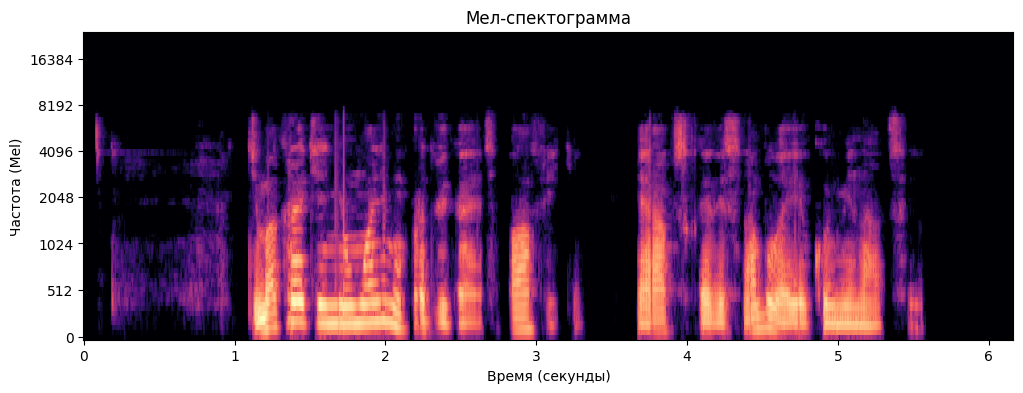

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Функция для извлечения мел-спектрограммы
def extract_melspectrogram(audio, sr=16000, n_fft=1024, hop_length=256, n_mels=80):
    mel = librosa.feature.melspectrogram(
        y=audio, sr=sr, n_fft=n_fft,
        hop_length=hop_length, n_mels=n_mels
    )
    mel_db = librosa.power_to_db(mel, ref=np.max)
    return mel_db  # форма: [n_mels, time]

# Извлекаем спектрограмму (форма: [n_mels, time])
mel = extract_melspectrogram(audio_array, sr=sampling_rate)

# Рассчитываем реальное время
total_frames = mel.shape[1]  # Количество временных кадров
true_duration = total_frames * 256 / sampling_rate
print(f"Реальная длительность: {true_duration:.2f} сек")

# Визуализация
plt.figure(figsize=(12, 4))
librosa.display.specshow(mel,  # Передаём оригинальную форму
                       sr=sampling_rate,
                       hop_length=256,
                       x_axis='time',
                       y_axis='mel',
                       # Явно задаём временные метки:
                       x_coords=np.linspace(0, true_duration, num=total_frames))
plt.title('Мел-спектограмма')
plt.xlabel('Время (секунды)')
plt.ylabel('Частота (Mel)')
plt.show()

## Подготовка данных для MFA и выполнение:


### 1. Выделим уникальные слова из датасета (для создания словаря в дальнейшем);

In [ ]:
import re
from collections import defaultdict

# Уникальные слова из датасета (чтобы избежать дубликатов)
unique_words = set()
for sample in dataset:
    words = re.findall(r"[а-яёА-ЯЁ]+", sample["sentence"].lower())  # Убрали дефис из паттерна
    unique_words.update(words)

###  2. Подготовим аудио и текст: сохраним данные из датасета в одну папку.

In [ ]:
import os
import re
import shutil
from scipy.io.wavfile import write

# Папка для данных
audio_dir = text_dir = "/content/data_for_mfa"

shutil.rmtree(audio_dir, ignore_errors=True)
os.makedirs(audio_dir, exist_ok=True)

def clean_text_for_mfa(text):
    """
    Приводит текст в формат, совместимый с MFA:
    1. Удаляет всю пунктуацию и кавычки
    2. Приводит к нижнему регистру
    3. Заменяет ё на е
    4. Оставляет только буквы и пробелы
    """
    text = text.lower()
    text = text.replace('ё', 'е')
    text = re.sub(r"[^а-яё\s]", "", text)  # Удаляем всё, кроме букв и пробелов
    text = re.sub(r"\s+", " ", text).strip()  # Удаляем двойные пробелы
    return text

# Сохраняем данные с правильным форматированием
for i, sample in enumerate(dataset.select(range(5000))):
    # Обработка аудио
    audio = sample["audio"]["array"]
    sr = sample["audio"]["sampling_rate"]
    audio_path = os.path.join(audio_dir, f"sample_{i}.wav")
    write(audio_path, sr, audio)

    # Обработка текста
    raw_text = sample["sentence"]
    clean_text = clean_text_for_mfa(raw_text)

    # Сохраняем в .lab файл
    text_path = os.path.join(text_dir, f"sample_{i}.lab")
    with open(text_path, "w", encoding="utf-8") as f:
        f.write(clean_text)

print(f"Аудио: {len(os.listdir(audio_dir))/2} файлов .wav")
print(f"Тексты: {len(os.listdir(text_dir))/2} файлов .lab")
print("Пример обработанного текста:", clean_text)

Аудио: 5000.0 файлов .wav
Тексты: 5000.0 файлов .lab
Пример обработанного текста: ниже трех сот метров не опускайся


### Подготовка окружения с python 3.8 для MFA:

In [ ]:
# Удаляем предыдущие установки
!rm -rf /usr/local/miniconda3
!rm -rf /root/.conda

# Устанавливаем Miniconda заново
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda init bash
import os
os.environ['PATH'] = '/usr/local/bin:' + os.environ['PATH']

# Создаем чистое окружение
!conda create -n mfa_env -c conda-forge python=3.8 -y

--2025-07-07 02:43:57--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159476510 (152M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 152.09M   159MB/s    in 1.0s    

2025-07-07 02:43:58 (159 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [159476510/159476510]

PREFIX=/usr/local
Unpacking payload ...
entry_point.py:256: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
entry_point.py:256: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the fi

### Установка MFA:

In [ ]:
# Инициализируем conda для текущей сессии
!source /usr/local/etc/profile.d/conda.sh
!conda init bash

# Создаем окружение и устанавливаем пакеты
!conda create -n mfa_env -c conda-forge python=3.8 -y
!conda run -n mfa_env conda install -c conda-forge montreal-forced-aligner=2.2.17 kaldi sox -y
!conda run -n mfa_env pip install librosa==0.9.2 soundfile==0.12.1

# Активируем окружение и загружаем модели
!conda run -n mfa_env mfa model download acoustic russian_mfa
!conda run -n mfa_env mfa model download dictionary russian_mfa

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.13/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
no change     /root/.bashrc
No action taken.
Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: | done

## Package Plan ##

  environment location: /usr/local/envs/mfa_env

  added / updated specs:
    - python=3.8


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu 
  bzip2              conda-forge/linux-64::bzip

### Создадим словарь: слово -> фонемы;

In [ ]:
def load_transcriptions_dict(file_path):
    """Загружает словарь транскрипций из файла."""
    trans_dict = {}
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(maxsplit=1)
            if len(parts) == 2:
                word, trans = parts
                trans_dict[word.lower()] = trans
    return trans_dict

def save_matching_transcriptions(words, trans_dict, output_file):
    """Сохраняет слова и их транскрипции в файл, если они есть в словаре."""
    with open(output_file, 'w', encoding='utf-8') as f:
        for word in words:
            word_lower = word.lower()  # для унификации поиска
            if word_lower in trans_dict:
                f.write(f"{word_lower} {trans_dict[word_lower]}\n")


dict_path = '/content/result.dict'

# Загрузка словаря транскрипций
trans_dict = load_transcriptions_dict('/root/Documents/MFA/pretrained_models/dictionary/russian_mfa.dict')

# Сохранение результатов
save_matching_transcriptions(unique_words, trans_dict, dict_path)

In [ ]:
print(f"Словарь сохранён в {dict_path}")
print(f"Уникальных слов: {len(unique_words)}")

Словарь сохранён в /content/result.dict
Уникальных слов: 32463


### Применяем MFA для данных (аудио и текст), нашего словаря (слова -> фонемы) и акустическая модель (russian_mfa):

In [ ]:
!conda run -n mfa_env mfa align \
/content/data_for_mfa \
/content/result.dict\
russian_mfa \
/content/alignments \
--clean \
--verbose \
--single_speaker

 100% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5,000/100  [ 0:00:00 < 0:00:00 , 1,346 it/s ]
 100% ━━━━━━━━━━━━━━━━━━━━━━━━━━ 5,000/5,000  [ 0:00:02 < 0:00:00 , 2,699 it/s ]
 100% ━━━━━━━━━━━━━━━━━━━━━━━━ 10,000/10,000  [ 0:00:01 < 0:00:00 , 8,145 it/s ]
 100% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5,000/5,000  [ 0:09:16 < 0:00:00 , 9 it/s ]
 100% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5,000/5,000  [ 0:00:08 < 0:00:00 , 617 it/s ]
 100% ━━━━━━━━━━━━━━━━━━━━━━━━━━ 5,000/5,000  [ 0:00:01 < 0:00:00 , 4,247 it/s ]
 100% ━━━━━━━━━━━━━━━━━━━━━━━━━━ 5,000/5,000  [ 0:00:10 < 0:00:00 , 5,222 it/s ]
  99% ━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 4,957/5,000  [ 0:00:49 < 0:00:01 , 101 it/s ]
 100% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/1  [ 0:00:32 < 0:00:00 , 13 it/s ]
  98% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━  4,908/5,000  [ 0:01:04 < 0:00:02 , 80 it/s ]
  98% ━━━━━━━━━━━━━━━━━━━━━━━━━━━  4,908/5,000  [ 0:00:15 < 0:00:01 , 336 it/s ]
 100% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5,000/5,000  [ 0:00:39 < 0:00:00 , 127 it/s ]

 INFO     Setting up corpus

### Загружаем результаты MFA:

In [ ]:
from textgrid import TextGrid

def load_mfa_results(textgrid_path):
    """Загружает временные метки фонем из файла TextGrid"""
    tg = TextGrid.fromFile(textgrid_path)
    phoneme_tier = tg.getFirst("phones")
    return [(interval.mark, interval.minTime, interval.maxTime)
            for interval in phoneme_tier]

# Пример:
phoneme_timings = load_mfa_results("/content/alignments/sample_0.TextGrid")
print(phoneme_timings[:5])

[('', 0.0, 1.11), ('dʲ', 1.11, 1.14), ('ɪ', 1.14, 1.15), ('m', 1.15, 1.22), ('ɐ', 1.22, 1.29)]


## Сопоставим мел-спектограммы с фонемами:

In [ ]:
def align_phonemes_to_mel(phoneme_timings, mel, sr=16000, hop_length=256):
    """Сопоставляет фонемы с кадрами мел-спектрограммы"""
    frame_duration = hop_length / sr
    aligned_data = []

    for phoneme, start, end in phoneme_timings:
        start_frame = int(start / frame_duration)
        end_frame = int(end / frame_duration)
        aligned_data.append({
            "phoneme": phoneme,
            "start_frame": start_frame,
            "end_frame": end_frame,
            "mel_frames": mel[start_frame:end_frame]  # Соответствующие кадры
        })

    return aligned_data

aligned_data = align_phonemes_to_mel(phoneme_timings, mel)

### Визуализация:

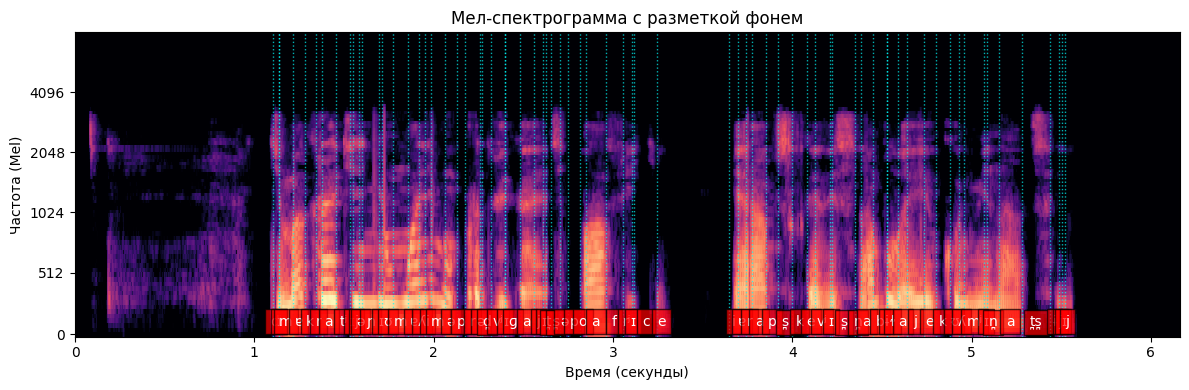

In [ ]:
def visualize_alignment(aligned_data, mel_spectrogram, sr=16000, hop_length=256):
    plt.figure(figsize=(12, 4))

    total_frames = mel_spectrogram.shape[1]  # Количество временных кадров
    true_duration = total_frames * hop_length / sampling_rate

    librosa.display.specshow(mel_spectrogram,
                           sr=sr,
                           hop_length=hop_length,
                           x_axis='time',
                           y_axis='mel',
                           x_coords=np.linspace(0, true_duration, num=total_frames),
                           cmap='magma')

    for segment in aligned_data:
        phoneme = segment["phoneme"]
        start_t = segment["start_frame"] * hop_length / sr
        end_t = segment["end_frame"] * hop_length / sr

        if phoneme not in ["", "sil", "sp"]:
            plt.axvline(x=start_t, color='cyan', linestyle=':', linewidth=1, alpha=0.7)
            plt.text((start_t + end_t)/2, mel_spectrogram.shape[0]*0.9,  # Динамическая позиция
                    phoneme, ha='center', color='white', fontsize=10,
                    bbox=dict(facecolor='red', alpha=0.7))

    plt.title('Мел-спектрограмма с разметкой фонем')
    plt.xlabel('Время (секунды)')
    plt.ylabel('Частота (Mel)')
    plt.tight_layout()
    plt.show()

# Пример использования
visualize_alignment(aligned_data, mel)

## Извлекаем длинности фонем для FastSpeech:

In [ ]:
def get_phoneme_durations(aligned_data):
    return [entry["end_frame"] - entry["start_frame"] for entry in aligned_data]

# Пример:
durations = get_phoneme_durations(aligned_data)
print(durations[:10])

[69, 2, 0, 5, 4, 4, 2, 5, 5, 1]


## Подготовка и сохранение pitch:

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt
import glob
import os
import librosa
from tqdm import tqdm  # для прогресс-бара

# Пути
audio_dir = '/content/data_for_mfa'
pitch_dir = '/content/pitch'
os.makedirs(pitch_dir, exist_ok=True)  # создаем папку, если нет

# Параметры извлечения pitch
sr = 16000  # частота дискретизации
hop_length = 256  # шаг в сэмплах
success_count = 0

# Проходим по всем аудиофайлам
audio_files = [f for f in os.listdir(audio_dir) if f.endswith('.wav')]
total_files = len(audio_files)

for audio_file in tqdm(audio_files, desc="Extracting pitch"):
    # Загружаем аудио
    y, _ = librosa.load(os.path.join(audio_dir, audio_file), sr=sr)

    # Извлекаем pitch (используем pyin для более точного определения)
    f0, _, _ = librosa.pyin(y, fmin=80, fmax=450, sr=sr,
                           hop_length=hop_length, frame_length=2048)

    # Сохраняем сырой pitch
    np.save(os.path.join(pitch_dir, f"{os.path.splitext(audio_file)[0]}.npy"), f0)
    success_count += 1

def process_pitch(f0_raw, sr=16000, hop_length=256):
    """Комплексная обработка pitch-контура"""
    # 1. Жёсткая фильтрация аномалий
    f0 = np.where((f0_raw >= 85) & (f0_raw <= 450), f0_raw, 0)

    # 2. Медианная фильтрация (удаление одиночных выбросов)
    f0 = median_filter(f0, size=5)

    # 3. Расширение нулевых зон (объединение коротких пауз)
    for _ in range(2):
        nonzero = np.where(f0 > 0)[0]
        if len(nonzero) > 1:
            f0 = np.interp(np.arange(len(f0)), nonzero, f0[nonzero])

    # 4. Сглаживание резких скачков
    if len(f0[f0 > 0]) > 10:
        f0_smooth = np.convolve(f0, np.ones(3)/3, mode='same')
        f0 = np.where(f0 > 0, f0_smooth, 0)

    return f0




pitch_files = glob.glob(os.path.join(pitch_dir, "*.npy"))
for pitch_file in tqdm(pitch_files, desc="Processing pitch"):
    f0_raw = np.load(pitch_file)
    f0_processed = process_pitch(f0_raw)
    np.save(pitch_file, f0_processed)

# Итог
print(f"\nУспешно обработано: {success_count} из {total_files} файлов.")
print("Min pitch:", np.min(f0_processed[f0_processed > 0]))
print("Max pitch:", np.max(f0_processed))
print("Mean pitch:", np.mean(f0_processed[f0_processed > 0]))

Processing pitch: 100%|██████████| 5000/5000 [00:02<00:00, 2186.03it/s]


Успешно обработано: 5000 из 5000 файлов.
Min pitch: 72.0186637956368
Max pitch: 234.25371135130004
Mean pitch: 134.05407233190851


## Подготовка и сохранение энергии:

In [ ]:
# Папки
input_dir = '/content/data_for_mfa'
output_dir = '/content/energy'
os.makedirs(output_dir, exist_ok=True)

sr = 16000
hop_length = 256  # как у мел-спектрограмм
frame_length = 1024  # как у мел-спектрограмм

success_count = 0
total_files = 0

# Проходим по всем .wav файлам
for file in os.listdir(input_dir):
    if file.endswith('.wav'):
        total_files += 1
        name = os.path.splitext(file)[0]
        wav_path = os.path.join(input_dir, file)

        try:
            # Загружаем аудио
            y, sr = librosa.load(wav_path, sr=sr)

            rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]

            # Сохраняем
            energy_path = os.path.join(output_dir, name + '.npy')
            np.save(energy_path, rms)

            success_count += 1

        except Exception as e:
            print(f"{name}: ERROR — {e}")

# Итог
print(f"\nУспешно обработано: {success_count} из {total_files} файлов.")



Успешно обработано: 5000 из 5000 файлов.


## Подготовка и сохрание мел спектограмм:

In [ ]:
import sys
!{sys.executable} -m pip install librosa


# Папки
input_dir = '/content/data_for_mfa'
output_dir = '/content/mels'
os.makedirs(output_dir, exist_ok=True)

# Параметры мел-спектрограммы
n_mels = 80
sr_target = 16000  # частота дискретизации (укажи нужную, например 22050 или 16000)
hop_length = 256   # шаг (в сэмплах), можно изменить под свои параметры
win_length = 1024  # окно (в сэмплах)

success_count = 0
total_files = 0

for file in os.listdir(input_dir):
    if file.endswith('.wav'):
        total_files += 1
        name = os.path.splitext(file)[0]
        wav_path = os.path.join(input_dir, file)

        try:
            # Загружаем аудио с нужной частотой
            y, sr = librosa.load(wav_path, sr=sr_target)

            # Вычисляем мел-спектрограмму (power)
            melspec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels,
                                                     hop_length=hop_length,
                                                     win_length=win_length)
            # Переводим в логарифмическую шкалу (dB)
            log_melspec = librosa.power_to_db(melspec)

            # Транспонируем: [n_mels, t] -> [t, n_mels]
            log_melspec = log_melspec.T

            # Сохраняем
            mel_path = os.path.join(output_dir, name + '.npy')
            np.save(mel_path, log_melspec)

            success_count += 1

        except Exception as e:
            print(f"{name}: ERROR — {e}")

print(f"\nУспешно обработано: {success_count} из {total_files} файлов.")



Успешно обработано: 5000 из 5000 файлов.


## Подготовка данных для durations

In [ ]:
def load_phoneme_dict(dict_path="/content/result.dict"):
    phoneme_dict = {}
    with open(dict_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split('\t')

            word_part = parts[0]
            word = word_part.split()[0].lower()  # ключ в нижнем регистре

            phonemes = ' '.join(parts[4:])  # фонемы идут после 4-го таба
            phoneme_dict[word] = phonemes
    return phoneme_dict

phoneme_dict = load_phoneme_dict()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # удаляем пунктуацию
    return text.split()

def sentence_to_phonemes(sentence, phoneme_dict):
    words = preprocess_text(sentence)
    phonemes = []
    for word in words:
        if word in phoneme_dict:
            phonemes.append(phoneme_dict[word])
        else:
            phonemes.append("?")  # если слова нет в словаре
    return ' '.join(phonemes)

import json

def update_metadata_with_phonemes(metadata_path, phoneme_dict):
    with open(metadata_path, 'r', encoding='utf-8') as f:
        metadata = json.load(f)

    for item in metadata:
        item["phonemes"] = sentence_to_phonemes

## Подготовка и сохранение durations:

In [ ]:
import os
import json
import numpy as np
from pathlib import Path


def calculate_durations(textgrid_path, mel_frames, sr=16000, hop_length=256):
    """Вычисляет длительности в кадрах из TextGrid"""
    phoneme_timings = load_mfa_results(textgrid_path)
    frame_duration = hop_length / sr
    durations = []

    for _, start, end in phoneme_timings:
        start_frame = int(start / frame_duration)
        end_frame = int(end / frame_duration)
        durations.append(end_frame - start_frame)

    durations = np.array(durations, dtype=np.float32)

    # Проверка соответствия мел-спектрограмме
    total_frames = np.sum(durations)
    assert abs(total_frames - mel_frames) <= 3, (
        f"Сумма длительностей ({total_frames}) не соответствует "
        f"длине мел-спектрограммы ({mel_frames})"
    )

    return durations

def process_all_durations(data_dir="/content", output_dir="durations", sr=16000, hop_length=256):
    """Обрабатывает все файлы в директории"""
    data_dir = Path(data_dir)
    output_dir = Path(output_dir)
    output_dir.mkdir(exist_ok=True)

    phoneme_dict = load_phoneme_dict("/content/result.dict")

    # Создаем/обновляем metadata.json
    metadata = []
    mel_files = list((data_dir / "mels").glob("*.npy"))

    for mel_path in mel_files:
        base_name = mel_path.name.split('.')[0]

        textgrid_path = data_dir / "alignments" / f"{base_name}.TextGrid"
        pitch_path = data_dir / "pitch" / f"{base_name}.npy"
        energy_path = data_dir / "energy" / f"{base_name}.npy"

        pitch_exists = False
        energy_exists = False
        text = ""
        phonemes = ""
        durations = None

        text_path = Path(f"/content/data_for_mfa/{base_name}.lab")
        if text_path.exists():
          with open(text_path, "r", encoding="utf-8") as f:
              text = f.read().strip()

          phonemes = sentence_to_phonemes(text, phoneme_dict)


        if not textgrid_path.exists():
            print(f"Пропуск {base_name}: TextGrid файл не найден")
            continue

        try:
            mel = np.load(mel_path)
            durations = calculate_durations(textgrid_path, mel.shape[0], sr, hop_length)

            # Сохраняем длительности
            dur_path = data_dir / output_dir / f"{base_name}.npy"
            np.save(dur_path, durations)

            metadata.append({
                "base_name": base_name,
                "mel_path": str(mel_path),
                "textgrid_path": str(textgrid_path),
                "duration_path": str(dur_path),
                "pitch_path": str(pitch_path) if pitch_exists else "",
                "energy_path": str(energy_path) if energy_exists else "",
                "text": text,
                "phonemes": phonemes   # Заполните вручную

            })

        except Exception as e:
            print(f"Ошибка обработки {base_name}: {str(e)}")
            continue

    # Сохраняем метаданные
    with open(data_dir / "metadata.json", "w") as f:
        json.dump(metadata, f, indent=2, ensure_ascii=False)

    print(f"Обработано {len(metadata)} файлов. Длительности сохранены в {output_dir}")

process_all_durations()

Пропуск sample_2139: TextGrid файл не найден
Пропуск sample_2146: TextGrid файл не найден
Пропуск sample_3852: TextGrid файл не найден
Пропуск sample_1763: TextGrid файл не найден
Пропуск sample_4129: TextGrid файл не найден
Пропуск sample_2151: TextGrid файл не найден
Пропуск sample_3733: TextGrid файл не найден
Пропуск sample_2136: TextGrid файл не найден
Пропуск sample_2134: TextGrid файл не найден
Пропуск sample_3876: TextGrid файл не найден
Пропуск sample_3866: TextGrid файл не найден
Пропуск sample_3853: TextGrid файл не найден
Пропуск sample_2152: TextGrid файл не найден
Пропуск sample_2045: TextGrid файл не найден
Пропуск sample_3888: TextGrid файл не найден
Пропуск sample_4751: TextGrid файл не найден
Пропуск sample_2145: TextGrid файл не найден
Пропуск sample_2114: TextGrid файл не найден
Пропуск sample_2128: TextGrid файл не найден
Пропуск sample_2143: TextGrid файл не найден
Пропуск sample_3861: TextGrid файл не найден
Пропуск sample_2144: TextGrid файл не найден
Пропуск sa

## Разделяем данные на выборки:


In [ ]:
import os
import numpy as np
import torch
import json
from torch.utils.data import Dataset, DataLoader
import yaml

# Конфигурация
config = {
    "data": {
        "mel_dir": "/content/mels",
        "pitch_dir": "/content/pitch",
        "energy_dir": "/content/energy",
        "wav_dir": "/content/data_for_mfa",
        "text_dir": "/content/data_for_mfa",
        "val_size": 0.1,
        "batch_size": 16,
        "num_workers": 4
    },
    "model": {
        "n_mel_channels": 80,
        "n_symbols": 256,
        "symbols_embedding_dim": 512,
        "encoder_embedding_dim": 512,
        "encoder_n_convolutions": 3,
        "encoder_kernel_size": 5,
        "decoder_dim": 1024,
        "prenet_dim": 256,
        "max_decoder_steps": 1000,
        "gate_threshold": 0.5,
        "p_attention_dropout": 0.1,
        "p_decoder_dropout": 0.1,
        "n_speakers": 1,
        "speaker_embedding_dim": 0
    },
    "train": {
        "epochs": 10,
        "learning_rate": 0.0001,
        "weight_decay": 0,
        "grad_clip_thresh": 1.0,
        "save_step": 2000,
        "log_step": 5,
        "warmup_steps": 4000
    }
}

# Сохраним конфиг для дальнейшего использования
with open("config.yaml", "w") as f:
    yaml.dump(config, f)

# Создадим файл с метаданными
def prepare_metadata():
    metadata = []
    # Получаем список всех .lab файлов
    lab_files = [f for f in os.listdir(config["data"]["text_dir"]) if f.endswith('.lab')]

    for lab_file in lab_files:
        base_name = lab_file.replace('.lab', '')
        wav_path = os.path.join(config["data"]["wav_dir"], f"{base_name}.wav")
        mel_path = os.path.join(config["data"]["mel_dir"], f"{base_name}.npy")
        pitch_path = os.path.join(config["data"]["pitch_dir"], f"{base_name}.npy")
        energy_path = os.path.join(config["data"]["energy_dir"], f"{base_name}.npy")
        duration_path = os.path.join("/content/durations", f"{base_name}.npy")

        # Проверяем существование всех файлов
        if all(os.path.exists(p) for p in [wav_path, mel_path, pitch_path, energy_path]):
            with open(os.path.join(config["data"]["text_dir"], lab_file), 'r') as f:
                text = f.readline().strip()

            metadata.append({
                "base_name": base_name,
                "text": text,
                "wav_path": wav_path,
                "mel_path": mel_path,
                "pitch_path": pitch_path,
                "energy_path": energy_path,
                "duration_path": duration_path
            })

    # Разделим на train и val
    np.random.shuffle(metadata)
    val_size = int(len(metadata) * config["data"]["val_size"])
    train_metadata = metadata[val_size:]
    val_metadata = metadata[:val_size]

    # Сохраним метаданные
    with open("train_metadata.json", "w") as f:
        json.dump(train_metadata, f, indent=4)

    with open("val_metadata.json", "w") as f:
        json.dump(val_metadata, f, indent=4)

    return train_metadata, val_metadata

train_meta, val_meta = prepare_metadata()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch import optim
from torch.utils.data import Dataset, DataLoader
import math
import yaml
from typing import Optional

# Загрузка конфигурации
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)

class LengthRegulator(nn.Module):
    """Length Regulator"""
    def __init__(self):
        super(LengthRegulator, self).__init__()

    def forward(self, x, duration, max_len=None):
        output = []
        for x_i, d_i in zip(x, duration):
            expanded = self.expand(x_i, d_i)
            output.append(expanded)

        if max_len is not None:
            output = [self.pad_sequence(o, max_len) for o in output]

        output = torch.stack(output)
        return output

    def expand(self, x, d):
        if d.sum() == 0:
            print("All durations are zero!")
            d[d == 0] = 1

        d_cumsum = torch.cumsum(d, dim=0)
        d_total = d_cumsum[-1].item()
        expanded = torch.zeros((d_total, x.size(1)), device=x.device)

        for i in range(x.size(0)):
            t_s = d_cumsum[i-1] if i > 0 else 0
            t_e = d_cumsum[i]
            t_len = t_e - t_s
            expanded[t_s:t_e] = x[i].unsqueeze(0).expand(t_len, -1)

        return expanded

    def pad_sequence(self, x, max_len):
        if x.size(0) >= max_len:
            return x[:max_len]
        return torch.cat([x, torch.zeros((max_len - x.size(0), x.size(1)), device=x.device)])

class VariancePredictor(nn.Module):
    """Variance Predictor for pitch and energy"""
    def __init__(self, input_dim, filter_size, kernel_size, dropout):
        super(VariancePredictor, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv1d(input_dim, filter_size, kernel_size, padding=kernel_size//2),
            nn.ReLU()
        )
        self.conv2 = nn.Sequential(
            nn.Conv1d(filter_size, filter_size, kernel_size, padding=kernel_size//2),
            nn.ReLU()
        )
        self.linear = nn.Linear(filter_size, 1)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.conv1(x.transpose(1, 2))
        x = self.dropout(x)
        x = self.conv2(x)
        x = self.dropout(x)
        x = self.linear(x.transpose(1, 2))
        return x.squeeze(-1)


## Модель FastSpeech 2

In [ ]:
class FastSpeech2(nn.Module):
    """FastSpeech 2 Model with fixed dimension handling"""
    def __init__(self, config):
        super(FastSpeech2, self).__init__()

        model_config = config["model"]

        # Эмбединги текста
        self.embedding = nn.Embedding(
            model_config["n_symbols"],
            model_config["symbols_embedding_dim"],
            padding_idx=0
        )

        # Проекция на размер кодера
        self.embedding_proj = nn.Linear(
            model_config["symbols_embedding_dim"],
            model_config["encoder_embedding_dim"]
        )

        # Энкодер
        self.encoder_convs = nn.ModuleList([
            nn.Sequential(
                nn.Conv1d(
                    model_config["encoder_embedding_dim"],
                    model_config["encoder_embedding_dim"],
                    model_config["encoder_kernel_size"],
                    padding=(model_config["encoder_kernel_size"]-1)//2,
                    dilation=1
                ),
                nn.BatchNorm1d(model_config["encoder_embedding_dim"]),
                nn.ReLU(),
                nn.Dropout(0.1)
            )
            for _ in range(model_config["encoder_n_convolutions"])
        ])

        # Предикторы дисперсии
        self.duration_predictor = VariancePredictor(
            model_config["encoder_embedding_dim"],
            model_config["encoder_embedding_dim"] // 2,
            3, 0.1
        )
        self.pitch_predictor = VariancePredictor(
            model_config["encoder_embedding_dim"],
            model_config["encoder_embedding_dim"] // 2,
            3, 0.1
        )
        self.energy_predictor = VariancePredictor(
            model_config["encoder_embedding_dim"],
            model_config["encoder_embedding_dim"] // 2,
            3, 0.1
        )

        # Pitch and energy эмбединги
        self.pitch_embedding = nn.Linear(1, model_config["encoder_embedding_dim"])
        self.energy_embedding = nn.Linear(1, model_config["encoder_embedding_dim"])

        # Регулятор длины
        self.length_regulator = LengthRegulator()

        # Декодер с постоянными размерами
        self.decoder_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(model_config["encoder_embedding_dim"],
                         model_config["encoder_embedding_dim"]),
                nn.ReLU(),
                nn.Dropout(0.1))
            for _ in range(4)
        ])

        # Финальная проекция на мел-спектрограмму
        self.mel_proj = nn.Linear(
            model_config["encoder_embedding_dim"],
            model_config["n_mel_channels"]
        )

    def forward(self, text, src_mask=None, mel_mask=None,
                duration_target=None, pitch_target=None, energy_target=None,
                max_len=None):
        # Входящий текст: [batch_size, text_seq_len]

        # 1. Эмбединги текста
        x = self.embedding(text)  # [batch, text_seq_len, symbol_embed_dim]
        x = self.embedding_proj(x)  # [batch, text_seq_len, encoder_dim]

        # 2. Обработка энкодера
        for conv in self.encoder_convs:
            x = conv(x.transpose(1, 2)).transpose(1, 2)  # [batch, text_seq_len, encoder_dim]

        # 3. Прогнозирование продолжительности
        log_duration = self.duration_predictor(x)  # [batch, text_seq_len]

        if duration_target is not None:
            duration = duration_target
        else:
            duration = torch.exp(log_duration) - 1

        # 4. Регулирование длины
        x = self.length_regulator(x, duration, max_len)  # [batch, mel_seq_len, encoder_dim]

        # 5. Прогнозирование питча и встраивание
        pitch_pred = self.pitch_predictor(x)  # [batch, mel_seq_len]
        if pitch_target is not None:
            pitch_emb = self.pitch_embedding(pitch_target.unsqueeze(-1))
        else:
            pitch_emb = self.pitch_embedding(pitch_pred.unsqueeze(-1))
        x = x + pitch_emb  # [batch, mel_seq_len, encoder_dim]

        # 6. Прогнозированние энергии и встраивание
        energy_pred = self.energy_predictor(x)  # [batch, mel_seq_len]
        if energy_target is not None:
            energy_emb = self.energy_embedding(energy_target.unsqueeze(-1))
        else:
            energy_emb = self.energy_embedding(energy_pred.unsqueeze(-1))
        x = x + energy_emb  # [batch, mel_seq_len, encoder_dim]

        # 7. Обработка декодера
        for layer in self.decoder_layers:
            x = layer(x)  # [batch, mel_seq_len, encoder_dim]

        # 8. Проекция мел-спектрограммы
        mel_output = self.mel_proj(x)  # [batch, mel_seq_len, n_mels]

        return {
            "mel_output": mel_output,
            "duration_predicted": log_duration,
            "pitch_predicted": pitch_pred,
            "energy_predicted": energy_pred
        }

In [ ]:
def check_metadata(metadata_path):
    with open(metadata_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    print(f"\nПроверка {metadata_path}:")
    print(f"Всего записей: {len(data)}")

    sample = data[0]
    print("\nПример записи:")
    print(json.dumps(sample, indent=2, ensure_ascii=False))

    print("\nПроверка файлов для первой записи:")
    for key in ["mel_path", "duration_path", "pitch_path", "energy_path"]:
        path = sample.get(key, "Ключ отсутствует")
        exists = os.path.exists(path) if isinstance(path, str) else False
        print(f"{key}: {path} | exists={exists}")

# Проверяем оба файла
check_metadata("train_metadata.json")
check_metadata("val_metadata.json")



Проверка train_metadata.json:
Всего записей: 4500

Пример записи:
{
  "base_name": "sample_4327",
  "text": "выступаем за их укрепление и скорейшую универсализацию",
  "wav_path": "/content/data_for_mfa/sample_4327.wav",
  "mel_path": "/content/mels/sample_4327.npy",
  "pitch_path": "/content/pitch/sample_4327.npy",
  "energy_path": "/content/energy/sample_4327.npy",
  "duration_path": "/content/durations/sample_4327.npy"
}

Проверка файлов для первой записи:
mel_path: /content/mels/sample_4327.npy | exists=True
duration_path: /content/durations/sample_4327.npy | exists=True
pitch_path: /content/pitch/sample_4327.npy | exists=True
energy_path: /content/energy/sample_4327.npy | exists=True

Проверка val_metadata.json:
Всего записей: 500

Пример записи:
{
  "base_name": "sample_2890",
  "text": "индия выступает против вепонизации космического пространства",
  "wav_path": "/content/data_for_mfa/sample_2890.wav",
  "mel_path": "/content/mels/sample_2890.npy",
  "pitch_path": "/content/pit

## Создание датасета для FastSpeech

In [ ]:
class FastSpeech2Dataset(Dataset):
    def __init__(self, metadata_path):
      with open(metadata_path, "r", encoding="utf-8") as f:
          raw_metadata = json.load(f)

      print(f"Всего записей в файле: {len(raw_metadata)}")
      print("Пример записи:", raw_metadata[0])

      self.metadata = []
      for item in raw_metadata:
          # Проверяем все необходимые файлы
          required_files = [
              item.get("mel_path"),
              item.get("duration_path"),
              item.get("pitch_path"),
              item.get("energy_path")
          ]

          # Проверяем что все пути существуют
          if all(f and os.path.exists(f) for f in required_files):
              self.metadata.append(item)
          else:
              missing = [f for f in required_files if not (f and os.path.exists(f))]
              print(f"Пропуск {item['base_name']}: отсутствуют файлы {missing}")

      print(f"Успешно загружено {len(self.metadata)} валидных записей")

      if not self.metadata:
          raise ValueError("Нет валидных записей для загрузки! Проверьте пути к файлам.")

      # Создаем словарь символов
      self._build_vocabulary()

      # Вычисляем статистики
      self._compute_statistics()

    def _build_vocabulary(self):
        self.symbols = set()
        for item in self.metadata:
            self.symbols.update(item["text"])

        self.symbols = sorted(list(self.symbols))
        self.symbol_to_id = {s: i+1 for i, s in enumerate(self.symbols)}
        self.id_to_symbol = {i+1: s for i, s in enumerate(self.symbols)}

        with open("symbols.json", "w") as f:
            json.dump({
                "symbol_to_id": self.symbol_to_id,
                "id_to_symbol": self.id_to_symbol
            }, f)

    def _compute_statistics(self):
        try:
            self.pitch_mean, self.pitch_std = self._calculate_robust_stats("pitch")
            self.energy_mean, self.energy_std = self._calculate_robust_stats("energy")

            print(f"Pitch - Mean: {self.pitch_mean:.4f}, Std: {self.pitch_std:.4f}")
            print(f"Energy - Mean: {self.energy_mean:.4f}, Std: {self.energy_std:.4f}")
        except Exception as e:
            print(f"Ошибка вычисления статистик: {str(e)}")
            self.pitch_mean, self.pitch_std = 0.0, 1.0
            self.energy_mean, self.energy_std = 0.0, 1.0

            # Для контроля выведем статистики
            print(f"Pitch - Mean: {self.pitch_mean:.4f}, Std: {self.pitch_std:.4f}")
            print(f"Energy - Mean: {self.energy_mean:.4f}, Std: {self.energy_std:.4f}")

    def _calculate_robust_stats(self, feature):
        values = []
        for item in self.metadata:
            data = np.load(item[f"{feature}_path"])
            data = data[data > 0]  # Фильтруем отрицательные значения
            if len(data) > 0:
                q25, q75 = np.percentile(data, [25, 75])
                iqr = q75 - q25
                mask = (data >= q25 - 1.5*iqr) & (data <= q75 + 1.5*iqr)
                values.extend(data[mask].tolist())
        return np.mean(values), np.std(values)

    def __getitem__(self, idx):
        item = self.metadata[idx]

        # 1. Обработка Mel (уже нормализованы)
        mel = np.load(item["mel_path"])
        mel = np.clip(mel, -1, 1)  # Жёсткое ограничение

        # 2. Обработка Pitch
        pitch = np.load(item["pitch_path"])
        pitch = np.clip(pitch, 0, None)  # Удаляем отрицательные
        pitch = (pitch - self.pitch_mean) / self.pitch_std
        pitch = np.clip(pitch, -3, 3)  # Ограничиваем выбросы

        # 3. Обработка Energy
        energy = np.load(item["energy_path"])
        energy = np.clip(energy, 0, None)
        energy = (energy - self.energy_mean) / self.energy_std
        energy = np.clip(energy, -3, 3)

        # 4. Текст и длительности
        text = [self.symbol_to_id[s] for s in item["text"] if s in self.symbol_to_id]

        # 5. Длительности из файла
        duration = np.load(item["duration_path"])

        return {
            "text": torch.LongTensor(text),
            "mel": torch.FloatTensor(mel),
            "pitch": torch.FloatTensor(pitch),
            "energy": torch.FloatTensor(energy),
            "duration": torch.FloatTensor(duration),  # Важно: float!
            "base_name": item["base_name"]
        }

    def __len__(self):
        return len(self.metadata)


    def _calculate_stats(self, feature):
        all_values = []
        for item in self.metadata:
            feat = np.load(item[f"{feature}_path"])
            all_values.append(feat)
        all_values = np.concatenate(all_values)
        return np.mean(all_values), np.std(all_values)


    def collate_fn(self, batch):
        texts = [item["text"] for item in batch]
        mels = [item["mel"] for item in batch]
        pitches = [item["pitch"] for item in batch]
        energies = [item["energy"] for item in batch]
        durations = [item["duration"] for item in batch]
        base_names = [item["base_name"] for item in batch]

        # Паддинг текста
        text_lengths = torch.LongTensor([text.size(0) for text in texts])
        max_text_len = max(text_lengths)
        text_padded = torch.LongTensor(len(texts), max_text_len).zero_()
        for i, text in enumerate(texts):
            text_padded[i, :text.size(0)] = text

        # Паддинг мела
        mel_lengths = torch.LongTensor([mel.size(0) for mel in mels])
        max_mel_len = max(mel_lengths)
        mel_padded = torch.FloatTensor(len(mels), max_mel_len, mels[0].size(1)).zero_()
        for i, mel in enumerate(mels):
            mel_padded[i, :mel.size(0), :] = mel

        # Паддинг pitch и energy
        pitch_padded = torch.FloatTensor(len(pitches), max_mel_len).zero_()
        energy_padded = torch.FloatTensor(len(energies), max_mel_len).zero_()
        for i, (p, e) in enumerate(zip(pitches, energies)):
            pitch_padded[i, :p.size(0)] = p
            energy_padded[i, :e.size(0)] = e

        # Паддинг duration
        duration_padded = torch.LongTensor(len(durations), max_text_len).zero_()
        for i, d in enumerate(durations):
            duration_padded[i, :d.size(0)] = d

        return {
            "text": text_padded,
            "text_lengths": text_lengths,
            "mel": mel_padded,
            "mel_lengths": mel_lengths,
            "pitch": pitch_padded,
            "energy": energy_padded,
            "duration": duration_padded,
            "base_names": base_names
        }

# Создадим датасеты и загрузчики
train_dataset = FastSpeech2Dataset("train_metadata.json")
val_dataset = FastSpeech2Dataset("val_metadata.json")

train_loader = DataLoader(
    train_dataset,
    batch_size=config["data"]["batch_size"],
    shuffle=True,
    collate_fn=train_dataset.collate_fn,
    num_workers=0
)

val_loader = DataLoader(
    val_dataset,
    batch_size=config["data"]["batch_size"],
    shuffle=False,
    collate_fn=val_dataset.collate_fn,
    num_workers=config["data"]["num_workers"]
)

Всего записей в файле: 4500
Пример записи: {'base_name': 'sample_4327', 'text': 'выступаем за их укрепление и скорейшую универсализацию', 'wav_path': '/content/data_for_mfa/sample_4327.wav', 'mel_path': '/content/mels/sample_4327.npy', 'pitch_path': '/content/pitch/sample_4327.npy', 'energy_path': '/content/energy/sample_4327.npy', 'duration_path': '/content/durations/sample_4327.npy'}
Пропуск sample_2132: отсутствуют файлы ['/content/durations/sample_2132.npy']
Пропуск sample_2130: отсутствуют файлы ['/content/durations/sample_2130.npy']
Пропуск sample_2117: отсутствуют файлы ['/content/durations/sample_2117.npy']
Пропуск sample_1988: отсутствуют файлы ['/content/durations/sample_1988.npy']
Пропуск sample_2112: отсутствуют файлы ['/content/durations/sample_2112.npy']
Пропуск sample_3853: отсутствуют файлы ['/content/durations/sample_3853.npy']
Пропуск sample_2125: отсутствуют файлы ['/content/durations/sample_2125.npy']
Пропуск sample_1231: отсутствуют файлы ['/content/durations/sampl

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
import os
import json
import numpy as np
from pathlib import Path
from textgrid import TextGrid

def get_mask_from_lengths(lengths, max_len=None):
    if max_len is None:
        max_len = torch.max(lengths).item()

    ids = torch.arange(0, max_len, device=lengths.device)
    mask = (ids < lengths.unsqueeze(1)).bool()
    return mask

def get_mel_mask(mel_target):
    # Более стабильный вариант
    return (mel_target.abs().sum(-1) > 1e-5).float()

class FastSpeech2Loss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mel_loss = nn.L1Loss()  # Для спектрограмм
        self.duration_loss = nn.MSELoss()
        self.pitch_loss = nn.SmoothL1Loss()  # Менее чувствителен к выбросам
        self.energy_loss = nn.SmoothL1Loss()

    def forward(self, predictions, targets):
        mel_mask = get_mel_mask(targets["mel"])

        # Mel с правильным маскированием
        mel_loss = self.mel_loss(
            predictions["mel_output"] * mel_mask.unsqueeze(-1),
            targets["mel"] * mel_mask.unsqueeze(-1)
        )

        # Длительности с защитой от log(0)
        dur_loss = self.duration_loss(
            predictions["duration_predicted"],
            torch.log(torch.clamp(targets["duration"], min=0.1))
        )

        # Pitch/Energy с SmoothL1
        pitch_loss = self.pitch_loss(
            predictions["pitch_predicted"] * mel_mask,
            targets["pitch"] * mel_mask
        )

        energy_loss = self.energy_loss(
            predictions["energy_predicted"] * mel_mask,
            targets["energy"] * mel_mask
        )

        return {
            "loss": mel_loss + dur_loss + pitch_loss + energy_loss,
            "mel_loss": mel_loss,
            "duration_loss": dur_loss,
            "pitch_loss": pitch_loss,
            "energy_loss": energy_loss
        }

def train(model, train_loader, val_loader, optimizer, criterion, config, device):
    model.train()
    best_val_loss = float('inf')

    # Инициализация с дефолтными значениями
    grad_accum_steps = config["train"].get("grad_accum_steps", 1)
    grad_clip = config["train"].get("grad_clip_thresh", 1.0)
    min_lr = config["train"].get("min_learning_rate", 1e-6)

    # Scheduler с обработкой deprecated warning
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=3
    )
    early_stopping = ImprovedEarlyStopping(
        patience=3,  # Увеличиваем терпение
        min_delta=0.05,  # Требуем минимального улучшения
        verbose=True
    )

    # Автоматическое определение precision
    autocast_device = 'cuda' if device.type == 'cuda' else 'cpu'
    scaler = torch.cuda.amp.GradScaler(enabled=(device.type == 'cuda'))

    for epoch in range(config["train"]["epochs"]):
        model.train()
        epoch_loss = 0

        # Прогресс-бар с отключением в CI/Colab
        disable_tqdm = os.environ.get("DISABLE_TQDM", False)
        batch_iter = tqdm(train_loader, desc=f"Epoch {epoch}", disable=disable_tqdm)

        for batch_idx, batch in enumerate(batch_iter, 1):
            # Перенос данных с оптимизацией памяти
            text = batch["text"].to(device, non_blocking=True)
            mel = batch["mel"].to(device, non_blocking=True)
            pitch = batch["pitch"].to(device, non_blocking=True)
            energy = batch["energy"].to(device, non_blocking=True)
            duration = batch["duration"].to(device, non_blocking=True)
            text_lengths = batch["text_lengths"].to(device, non_blocking=True)
            mel_lengths = batch["mel_lengths"].to(device, non_blocking=True)

            with torch.amp.autocast(device_type=autocast_device, enabled=(device.type == 'cuda')):
                src_mask = get_mask_from_lengths(text_lengths)
                mel_mask = get_mask_from_lengths(mel_lengths)

                predictions = model(
                    text, src_mask, mel_mask,
                    duration_target=duration,
                    pitch_target=pitch,
                    energy_target=energy,
                    max_len=mel.size(1)
                )
                losses = criterion(predictions, {
                    "mel": mel,
                    "duration": duration,
                    "pitch": pitch,
                    "energy": energy
                })

            # Масштабирование и аккумуляция градиентов
            loss = losses["loss"] / grad_accum_steps
            scaler.scale(loss).backward()

            if batch_idx % grad_accum_steps == 0 or batch_idx == len(train_loader):
                # Клиппинг градиентов с проверкой
                scaler.unscale_(optimizer)
                grad_norm = torch.nn.utils.clip_grad_norm_(
                    model.parameters(), grad_clip
                )

                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad(set_to_none=True)

                # Логирование
                batch_iter.set_postfix({
                    'loss': losses["loss"].item(),
                    'grad_norm': grad_norm.item(),
                    'lr': optimizer.param_groups[0]['lr'],
                    'mel_l': losses["mel_loss"].item(),
                    'dur_l': losses["duration_loss"].item(),
                    'pitch_l': losses["pitch_loss"].item(),
                    'energy_l': losses["energy_loss"].item()
                })

            epoch_loss += losses["loss"].item()

        # Валидация и регулировка LR
        val_loss = validate(model, val_loader, criterion, device)
        scheduler.step(val_loss)
        early_stopping(val_loss)

        # Сохранение лучшей модели
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save({
                "model": model.state_dict(),
                "optimizer": optimizer.state_dict(),
                "epoch": epoch,
                "config": config
            }, "best_model.pth")

        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

        # Проверка минимального LR
        if optimizer.param_groups[0]['lr'] < min_lr:
            print(f"Learning rate reached minimum {min_lr}")
            break

class ImprovedEarlyStopping:
    def __init__(self, patience=3, min_delta=0.001, verbose=True):
        self.patience = patience
        self.min_delta = min_delta  # Минимальное улучшение для сброса счетчика
        self.verbose = verbose
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss):
        if (self.best_loss - val_loss) > self.min_delta:
            # Значительное улучшение - сбрасываем счетчик
            self.best_loss = val_loss
            self.counter = 0
            if self.verbose:
                print(f'Validation loss improved to {val_loss:.4f}')
        else:
            # Улучшения нет или оно незначительное
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter}/{self.patience} (no improvement from {self.best_loss:.4f})')
            if self.counter >= self.patience:
                self.early_stop = True

def validate(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            text = batch["text"].to(device)
            mel = batch["mel"].to(device)
            pitch = batch["pitch"].to(device)
            energy = batch["energy"].to(device)
            duration = batch["duration"].to(device)
            text_lengths = batch["text_lengths"].to(device)
            mel_lengths = batch["mel_lengths"].to(device)

            src_mask = get_mask_from_lengths(text_lengths)
            mel_mask = get_mask_from_lengths(mel_lengths)

            predictions = model(
                text, src_mask, mel_mask,
                duration_target=duration,
                pitch_target=pitch,
                energy_target=energy,
                max_len=mel.size(1)
            )

            targets = {
                "mel": mel,
                "duration": duration,
                "pitch": pitch,
                "energy": energy
            }

            losses = criterion(predictions, targets)
            total_loss += losses["loss"].item()

    avg_loss = total_loss / len(val_loader)
    print(f"Validation Loss: {avg_loss}")
    model.train()
    return avg_loss

# Инициализация модели и обучения
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FastSpeech2(config).to(device)
optimizer = optim.Adam(
    model.parameters(),
    lr=config["train"]["learning_rate"],
    weight_decay=config["train"]["weight_decay"]
)
criterion = FastSpeech2Loss()

# Запуск обучения
train(model, train_loader, val_loader, optimizer, criterion, config, device)

/tmp/ipython-input-28-1543426335.py:82: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(device.type == 'cuda'))
Epoch 0: 100%|██████████| 276/276 [15:07<00:00,  3.29s/it, loss=1.26, grad_norm=1.15, lr=0.0001, mel_l=0.0664, dur_l=0.936, pitch_l=0.133, energy_l=0.128]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation Loss: 1.361176944548084
Validation loss improved to 1.3612


Epoch 1: 100%|██████████| 276/276 [14:56<00:00,  3.25s/it, loss=1.36, grad_norm=0.907, lr=0.0001, mel_l=0.0786, dur_l=0.796, pitch_l=0.27, energy_l=0.212]


Validation Loss: 1.3527482671122397
EarlyStopping counter: 1/3 (no improvement from 1.3612)


Epoch 2: 100%|██████████| 276/276 [14:41<00:00,  3.19s/it, loss=1.13, grad_norm=1.66, lr=0.0001, mel_l=0.0695, dur_l=0.765, pitch_l=0.16, energy_l=0.137]


Validation Loss: 1.3531428383242698
EarlyStopping counter: 2/3 (no improvement from 1.3612)


Epoch 3: 100%|██████████| 276/276 [14:59<00:00,  3.26s/it, loss=1.23, grad_norm=1.1, lr=0.0001, mel_l=0.073, dur_l=0.754, pitch_l=0.236, energy_l=0.169]


Validation Loss: 1.3504675357572493
EarlyStopping counter: 3/3 (no improvement from 1.3612)
Early stopping triggered
